In [25]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#import norm and invnorm
from scipy.stats import norm

# Q1
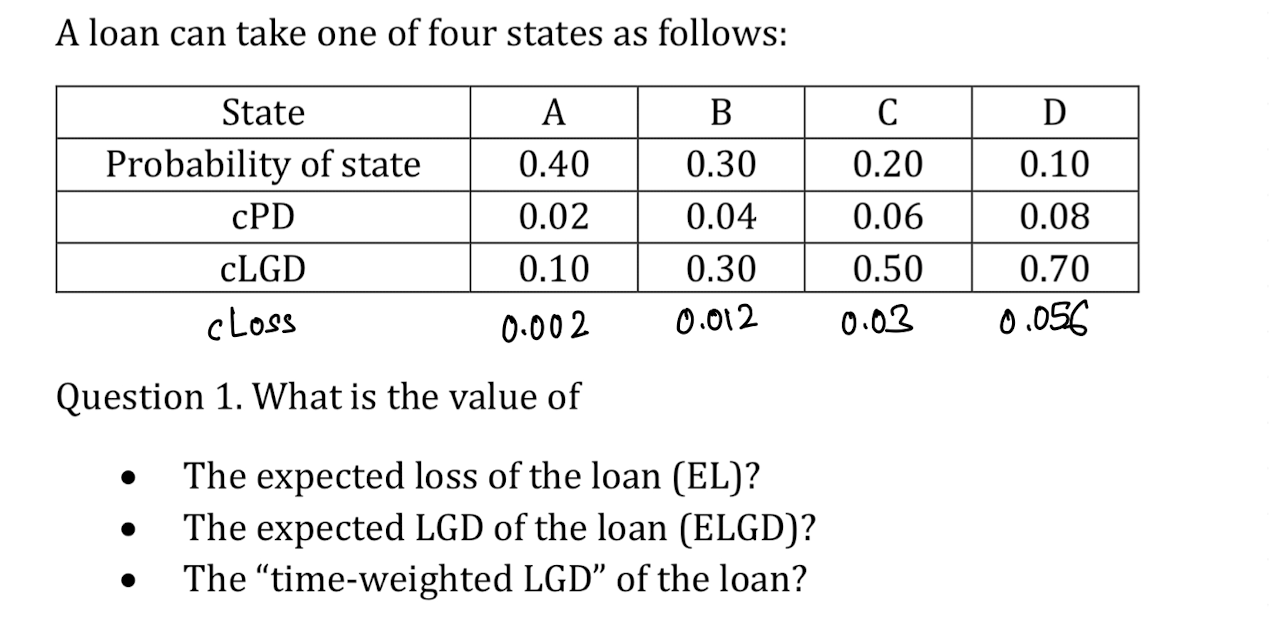

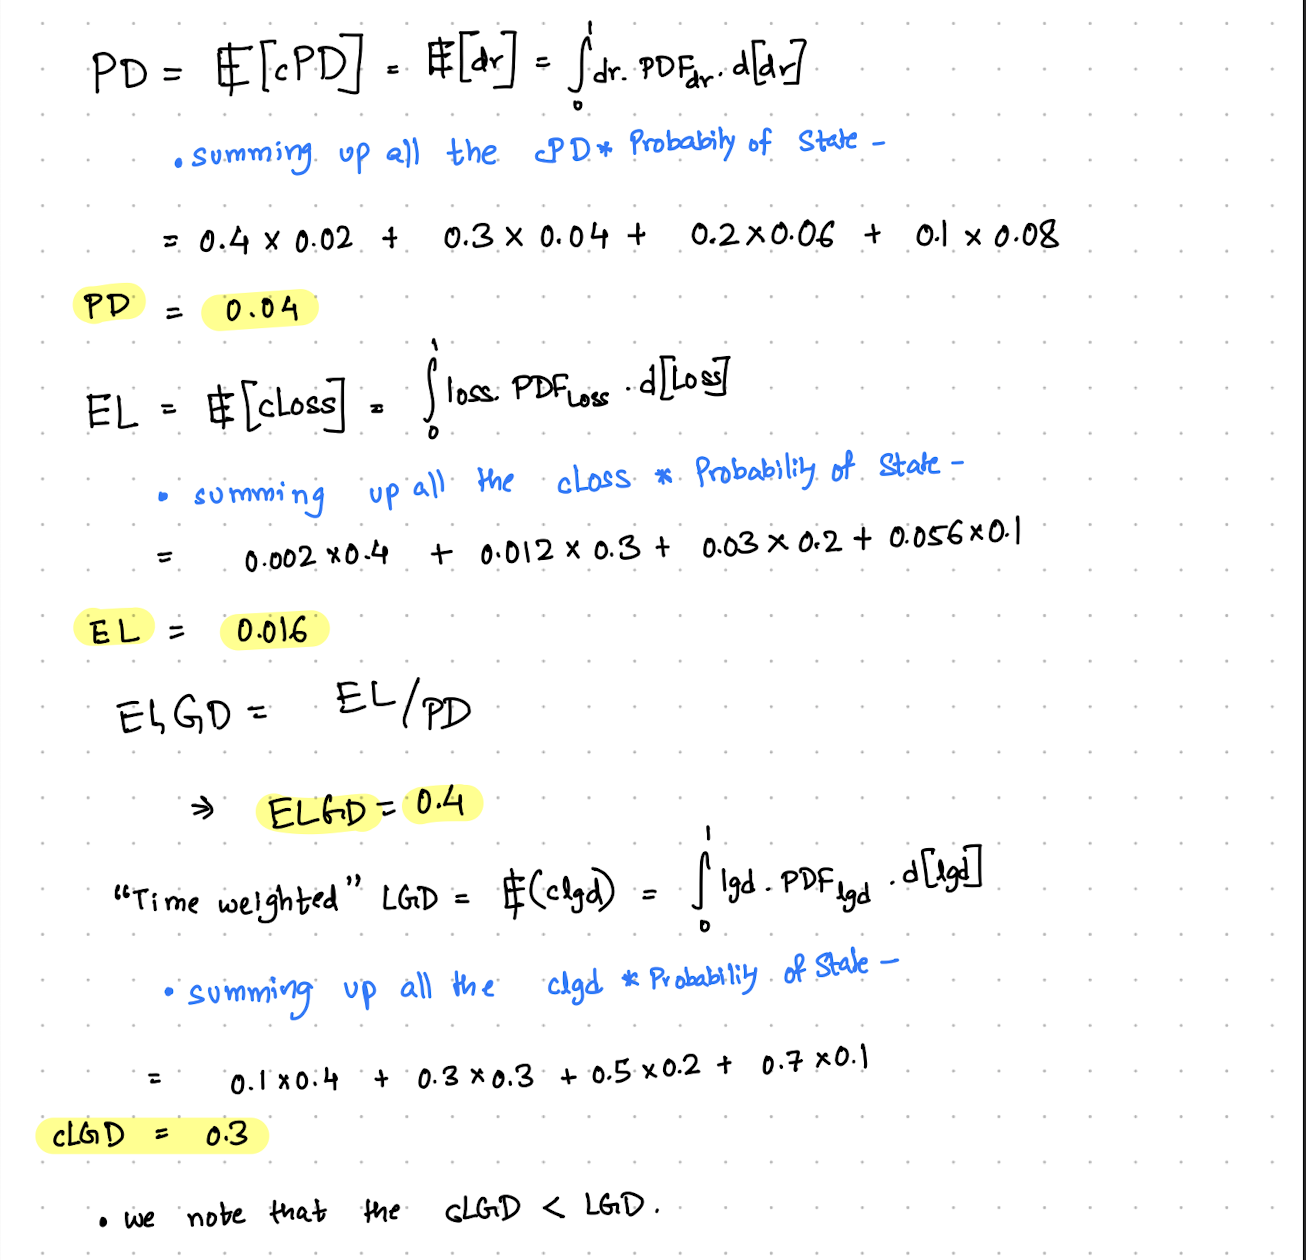

## Q2
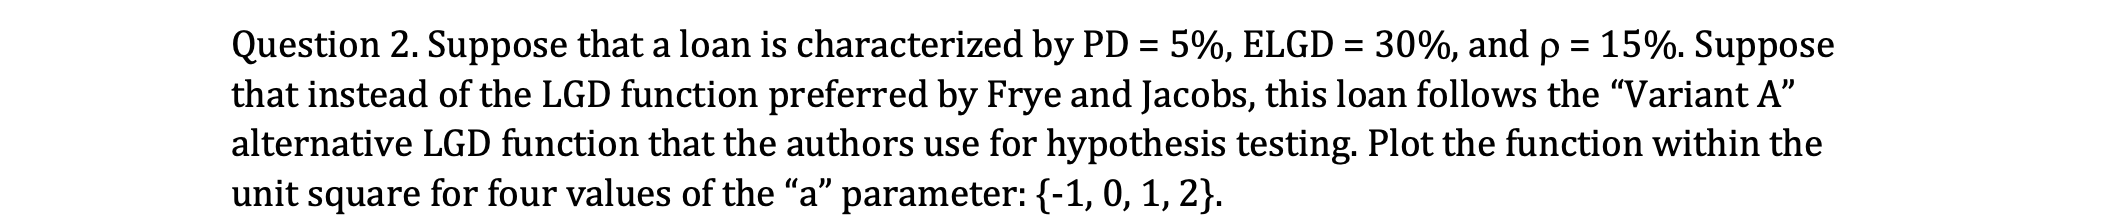

In [26]:
pd = 0.05
elgd = 0.3
rho = 0.15
el = pd * elgd

def clgd(cpd, a):
    if a == 0:
        return norm.cdf(norm.ppf(cpd) - (norm.ppf(pd) - norm.ppf(el))/np.sqrt(1-rho)) / cpd
    else:
        return elgd**a * norm.cdf(norm.ppf(cpd) - (norm.ppf(pd) - norm.ppf(el/elgd**a))/np.sqrt(1-rho)) / cpd

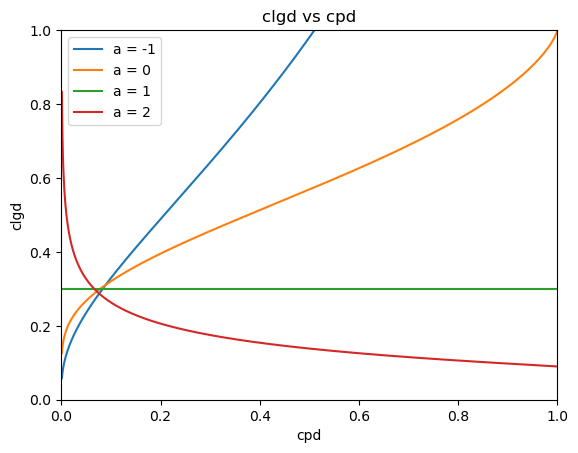

In [27]:
#plot the clgd for cpd ranging from 0 to 1 with step size 0.01 and a = 1
cpd = np.arange(0, 1, 0.001)
plt.plot(cpd, clgd(cpd, -1), label = 'a = -1')
plt.plot(cpd, clgd(cpd, 0), label = 'a = 0')
plt.plot(cpd, clgd(cpd, 1), label = 'a = 1')
plt.plot(cpd, clgd(cpd, 2), label = 'a = 2')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('cpd')
plt.ylabel('clgd')
plt.title('clgd vs cpd')
plt.legend()
plt.show()

# Q3
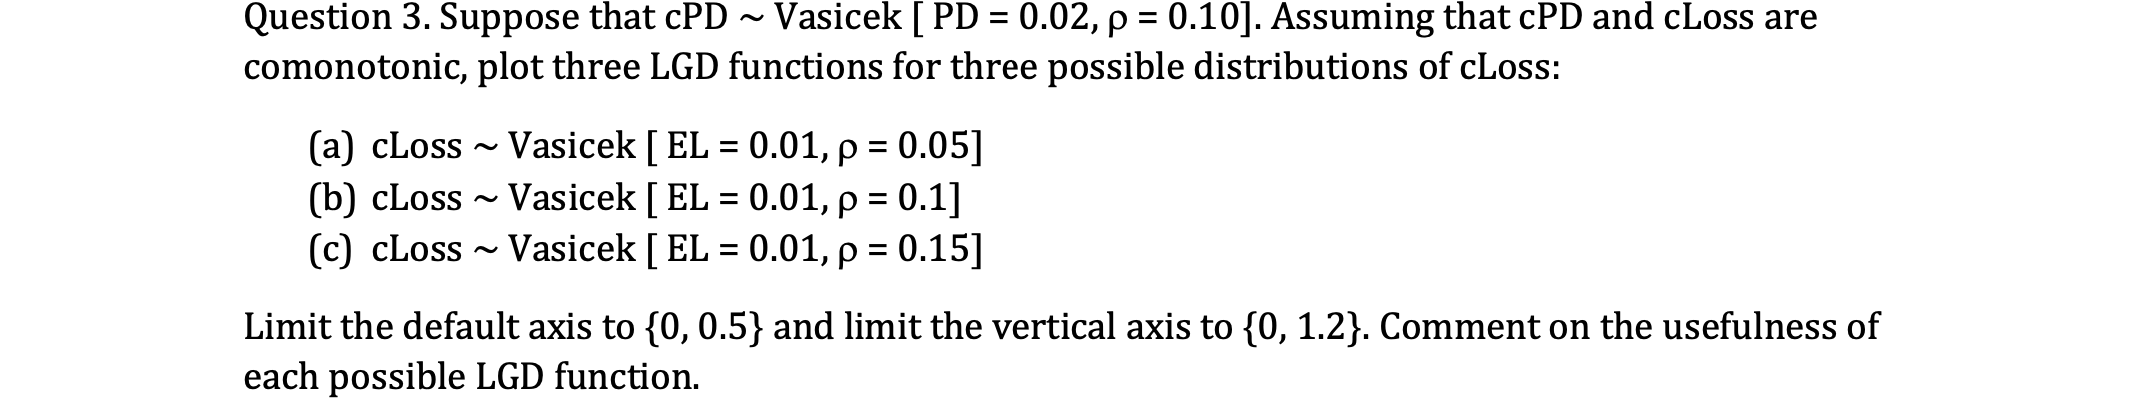

In [28]:
def cpd_vasichek(pd, rho, cpd):
    return norm.cdf((np.sqrt(1-rho) * norm.ppf(cpd) - norm.ppf(pd))/np.sqrt(rho))

def closs_inv(q, el, rho1):
    return norm.cdf((norm.ppf(el) + np.sqrt(rho1)*norm.ppf(q))/np.sqrt(1-rho1))

def clgd_vasichek(pd, rho, cpd, el, rho1):
    return closs_inv(cpd_vasichek(pd, rho, cpd), el, rho1) / cpd

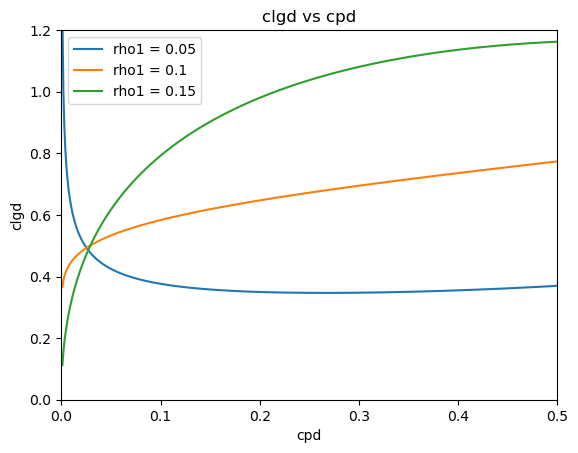

In [29]:
#cpd_vasichek uses pd=0.02 and rho=0.10
#closs_inv has three cases: 
# case a) el = 0.01 , rho1 = 0.05
# case b) el = 0.01 , rho1 = 0.1
# case c) el = 0.01 , rho1 = 0.15

#plot lgd vs cpd for case a), b) and c)
cpd = np.arange(0, 1, 0.001)
plt.plot(cpd, clgd_vasichek(0.02, 0.1, cpd, 0.01, 0.05), label = 'rho1 = 0.05')
plt.plot(cpd, clgd_vasichek(0.02, 0.1, cpd, 0.01, 0.1), label = 'rho1 = 0.1')
plt.plot(cpd, clgd_vasichek(0.02, 0.1, cpd, 0.01, 0.15), label = 'rho1 = 0.15')
plt.ylim(0, 1.2)
plt.xlim(0, 0.5)
plt.xlabel('cpd')
plt.ylabel('clgd')
plt.title('clgd vs cpd')
plt.legend()
plt.show()

>Usefullness of each of the three LGD functions:
>
>The LGD function with rho=0.15 could be used in scenarios where we are seeing a very high sensitivity of LGD to the PD. This would mean that for small changes in PD, the LGD would change/increase significantly. Firms like this would be more likely to be in the financial sector.
>
>The LGD with rho=0.1 could be used in scenarios where we are seeing a moderate sensitivity of LGD to the PD. This would mean that for small changes in PD, the LGD would change/increase moderately. And as the LGD increases beying 0.1, the sensitivity of LGD to PD is almost flat. Firms like this would be more likely to be in the manufacturing sector.
>
>The LGD with rho=0.05 could be used in scenarios where we see inverse relationship between LGD and PD upto cpd of 10%. This would mean that for small changes in PD, the LGD would actually decrease. I could not think of any sector where this would be the case.
>
>In all the three functions we see the the clgd flatten oout with higher levels of cpd. The rho of 0.1 and 0.15 are more likely to be used in the real world as they are more realistic.

# Q4
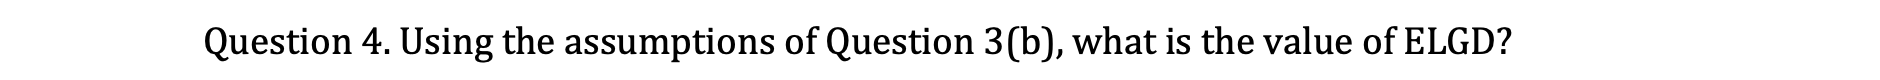

In [43]:
el_b = 0.01
pd_b = 0.02
print('The value of ELGD is', round(el_b/pd_b, 2))

The value of ELGD is 0.5
